In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from tabulate import tabulate
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LSTM
from keras.utils import to_categorical
from matplotlib import pyplot
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
import xgboost as xgb

In [ ]:
df = pd.DataFrame(pd.read_csv("/content/drive/MyDrive/Colab Notebooks/MiniProject-2-Dataset/csh109/csh109.ann.features.csv"))

In [ ]:
df = df[['lastSensorEventHours', 'windowDuration', 'prevDominantSensor1', 'prevDominantSensor2','lastSensorID', 'lastSensorLocation', 'lastMotionLocation', 'sensorCount-Bathroom', 'sensorCount-Bedroom', 'sensorCount-Ignore', 'sensorCount-OutsideDoor', 'sensorElTime-Bathroom', 'sensorElTime-DiningRoom', 'sensorElTime-Hall', 'sensorElTime-Ignore', 'sensorElTime-OutsideDoor', 'activity']].copy()

In [ ]:
df = df.drop(df.index[df['activity'].isin(['Step_Out', 'Other_Activity', 'Phone', 'Personal_Hygiene', 'Relax', 'Sleep_Out_Of_Bed', 'Drink', 'Dress', 'Evening_Meds', 'Wake_Up', 'Read', 'Morning_Meds', 'Work', 'Work_At_Table', 'Cook_Breakfast', 'Eat_Breakfast', 'Bathe', 'Cook_Lunch', 'Eat_Lunch', 'Wash_Lunch_Dishes', 'Go_To_Sleep', 'Bed_Toilet_Transition', 'Wash_Breakfast_Dishes', 'Groom', 'Cook', 'Eat', 'Wash_Dinner_Dishes', 'Wash_Dishes', 'Take_Medicine', 'Entertain_Guests'])])
df

,lastSensorEventHours,windowDuration,prevDominantSensor1,prevDominantSensor2,lastSensorID,lastSensorLocation,lastMotionLocation,sensorCount-Bathroom,sensorCount-Bedroom,sensorCount-Ignore,sensorCount-OutsideDoor,sensorElTime-Bathroom,sensorElTime-DiningRoom,sensorElTime-Hall,sensorElTime-Ignore,sensorElTime-OutsideDoor,activity
28,0.0,94.0,0.0,0.0,1.0,1.0,1.0,21.65,12.70,0.00,0.0,8.389743,86400.000000,86400.0,86400.000000,86400.000000,Sleep
30,0.0,55.0,1.0,0.0,1.0,1.0,1.0,19.40,14.95,0.00,0.0,10.217011,86400.000000,86400.0,86400.000000,86400.000000,Sleep
31,0.0,56.0,1.0,0.0,1.0,1.0,1.0,18.26,16.09,0.00,0.0,13.454694,86400.000000,86400.0,86400.000000,86400.000000,Sleep
32,0.0,51.0,1.0,0.0,1.0,1.0,1.0,17.11,17.24,0.00,0.0,14.560577,86400.000000,86400.0,86400.000000,86400.000000,Sleep
33,0.0,46.0,1.0,0.0,1.0,1.0,1.0,15.95,18.40,0.00,0.0,16.748844,86400.000000,86400.0,86400.000000,86400.000000,Sleep
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564445,23.0,7663.0,0.0,0.0,1.0,1.0,1.0,0.00,29.37,4.98,0.0,7729.023467,8155.453745,86400.0,6195.479569,8140.865226,Sleep
564447,23.0,8805.0,0.0,0.0,1.0,1.0,1.0,0.00,28.28,6.07,0.0,9078.839591,9505.269869,86400.0,405.271094,9490.681350,Sleep
564448,23.0,8483.0,0.0,0.0,1.0,1.0,1.0,0.00,29.53,4.82,0.0,9078.925833,9505.356111,86400.0,405.357336,9490.767592,Sleep
564449,23.0,8141.0,0.0,0.0,1.0,1.0,1.0,0.00,30.79,3.56,0.0,9079.951691,9506.381969,86400.0,406.383194,9491.793450,Sleep


In [ ]:
columns1 = df.columns.tolist()
columns1

['lastSensorEventHours',
 'windowDuration',
 'prevDominantSensor1',
 'prevDominantSensor2',
 'lastSensorID',
 'lastSensorLocation',
 'lastMotionLocation',
 'sensorCount-Bathroom',
 'sensorCount-Bedroom',
 'sensorCount-Ignore',
 'sensorCount-OutsideDoor',
 'sensorElTime-Bathroom',
 'sensorElTime-DiningRoom',
 'sensorElTime-Hall',
 'sensorElTime-Ignore',
 'sensorElTime-OutsideDoor',
 'activity']

In [ ]:
activity1 = df['activity'].unique().tolist()
activity1

['Sleep',
 'Toilet',
 'Leave_Home',
 'Enter_Home',
 'Work_At_Desk',
 'Cook_Dinner',
 'Eat_Dinner',
 'Watch_TV']

In [ ]:
Count1 = df['activity'].value_counts()
Count1

Cook_Dinner     37371
Work_At_Desk    17613
Toilet          12063
Sleep            8747
Watch_TV         8453
Eat_Dinner       6227
Leave_Home       4121
Enter_Home       3709
Name: activity, dtype: int64

In [ ]:
percentage1 = df['activity'].value_counts(normalize=True)*100
percentage1

Cook_Dinner     38.015747
Work_At_Desk    17.916870
Toilet          12.271118
Sleep            8.897909
Watch_TV         8.598836
Eat_Dinner       6.334432
Leave_Home       4.192098
Enter_Home       3.772990
Name: activity, dtype: float64

# CSH109 Train and Test Splitting

In [ ]:
X=df.drop('activity',axis=1)
Y=df['activity']


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=100)

# Shapes of Split Data

In [ ]:
x_train.shape,x_test.shape

((68812, 16), (29492, 16))

In [ ]:
y_train.shape,y_test.shape

((68812,), (29492,))

# Random Forest Classifier

In [ ]:
rfc=RandomForestClassifier(n_estimators=3,max_features='auto',random_state=100)

In [ ]:
rfc.fit(x_train,y_train)

RandomForestClassifier(n_estimators=3, random_state=100)

In [ ]:
rfc_preds=rfc.predict(x_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


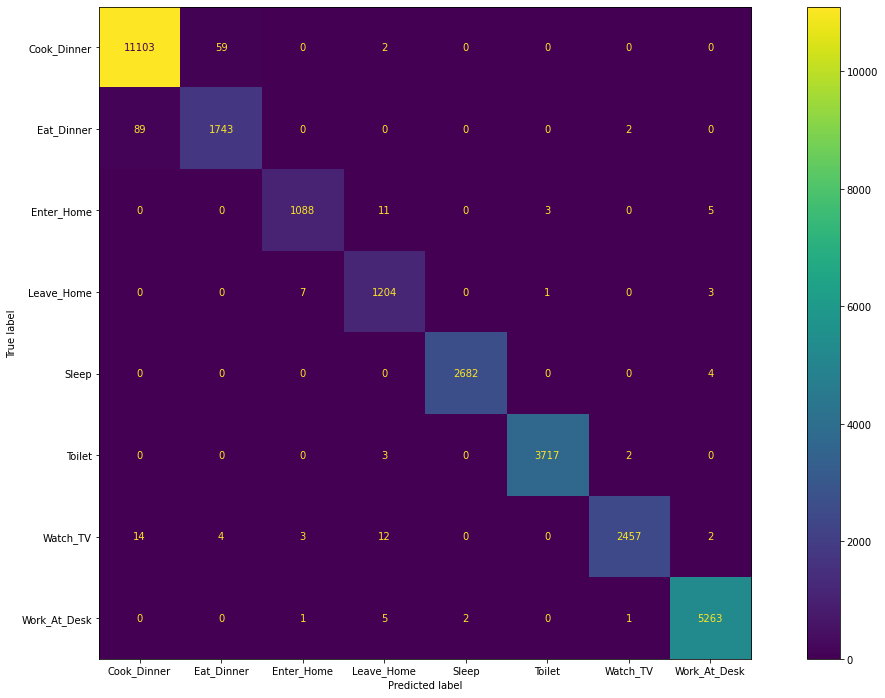

In [ ]:
fig, ax = plt.subplots(figsize=(20, 12))
plt.xticks(rotation=180)
plot_confusion_matrix(rfc,x_test,y_test,ax=ax)

In [ ]:
print(classification_report(y_test,rfc_preds))

              precision    recall  f1-score   support

 Cook_Dinner       0.99      0.99      0.99     11164
  Eat_Dinner       0.97      0.95      0.96      1834
  Enter_Home       0.99      0.98      0.99      1107
  Leave_Home       0.97      0.99      0.98      1215
       Sleep       1.00      1.00      1.00      2686
      Toilet       1.00      1.00      1.00      3722
    Watch_TV       1.00      0.99      0.99      2492
Work_At_Desk       1.00      1.00      1.00      5272

    accuracy                           0.99     29492
   macro avg       0.99      0.99      0.99     29492
weighted avg       0.99      0.99      0.99     29492



In [ ]:
rfc_accuracy=accuracy_score(y_test, rfc_preds)
rfc_accuracy=rfc_accuracy*100
print("The accuracy for Random forest classifier model is",round(rfc_accuracy,2),"%")

The accuracy for Random forest classifier model is 99.2 %


# K-Nearest Neighbour Classifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(x_train, y_train)
knn_preds=knn.predict(x_test) 

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


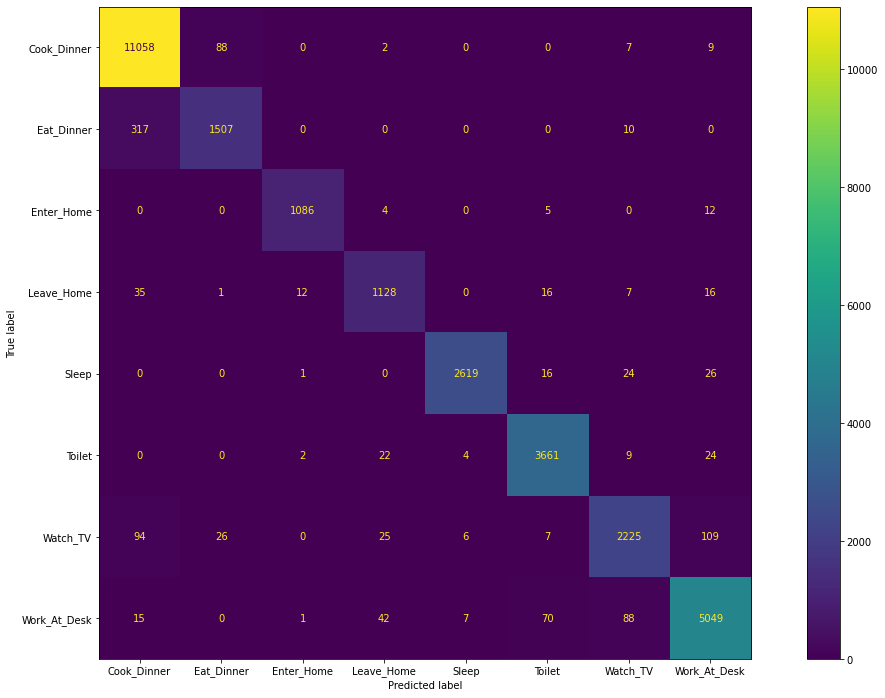

In [ ]:
fig, ax = plt.subplots(figsize=(20, 12))
plt.xticks(rotation=180)
plot_confusion_matrix(knn,x_test,y_test,ax=ax)

In [ ]:
print(classification_report(y_test,knn_preds))

              precision    recall  f1-score   support

 Cook_Dinner       0.96      0.99      0.98     11164
  Eat_Dinner       0.93      0.82      0.87      1834
  Enter_Home       0.99      0.98      0.98      1107
  Leave_Home       0.92      0.93      0.93      1215
       Sleep       0.99      0.98      0.98      2686
      Toilet       0.97      0.98      0.98      3722
    Watch_TV       0.94      0.89      0.92      2492
Work_At_Desk       0.96      0.96      0.96      5272

    accuracy                           0.96     29492
   macro avg       0.96      0.94      0.95     29492
weighted avg       0.96      0.96      0.96     29492



In [ ]:
knn_accuracy=accuracy_score(y_test, knn_preds)
knn_accuracy=knn_accuracy*100
print("The accuracy for K-Nearest Neighbour model is",round(knn_accuracy,2),"%")

The accuracy for K-Nearest Neighbour model is 96.07 %


# Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)
gnb_pred = gnb.predict(x_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


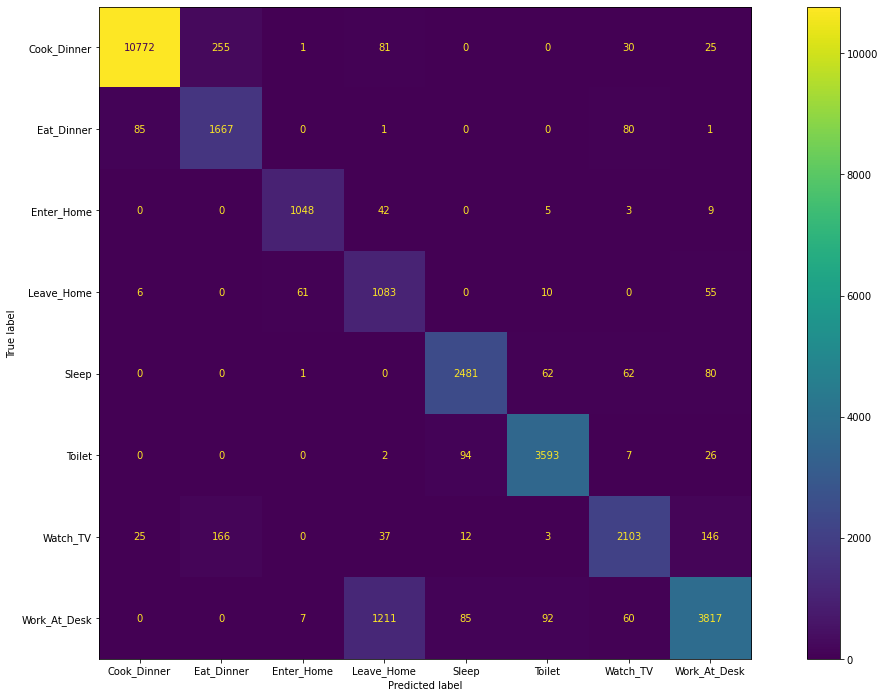

In [ ]:
fig, ax = plt.subplots(figsize=(20, 12))
plt.xticks(rotation=180)
plot_confusion_matrix(gnb,x_test,y_test,ax=ax)

In [ ]:
print(classification_report(y_test,gnb_pred))

              precision    recall  f1-score   support

 Cook_Dinner       0.99      0.96      0.98     11164
  Eat_Dinner       0.80      0.91      0.85      1834
  Enter_Home       0.94      0.95      0.94      1107
  Leave_Home       0.44      0.89      0.59      1215
       Sleep       0.93      0.92      0.93      2686
      Toilet       0.95      0.97      0.96      3722
    Watch_TV       0.90      0.84      0.87      2492
Work_At_Desk       0.92      0.72      0.81      5272

    accuracy                           0.90     29492
   macro avg       0.86      0.90      0.87     29492
weighted avg       0.92      0.90      0.91     29492



In [ ]:
gnb_accuracy=accuracy_score(y_test, gnb_pred)
gnb_accuracy=gnb_accuracy*100
print("The accuracy for Gaussian Naive Bayes model is",round(gnb_accuracy,2),"%")

The accuracy for Gaussian Naive Bayes model is 90.07 %


# X Gradient Boost

In [ ]:
xgb = xgb.XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'multi:softmax',
 nthread=4,
 scale_pos_weight=1,
 seed= 4353)

In [ ]:
xgb.fit(x_train, y_train)
XGB_pred= xgb.predict(x_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


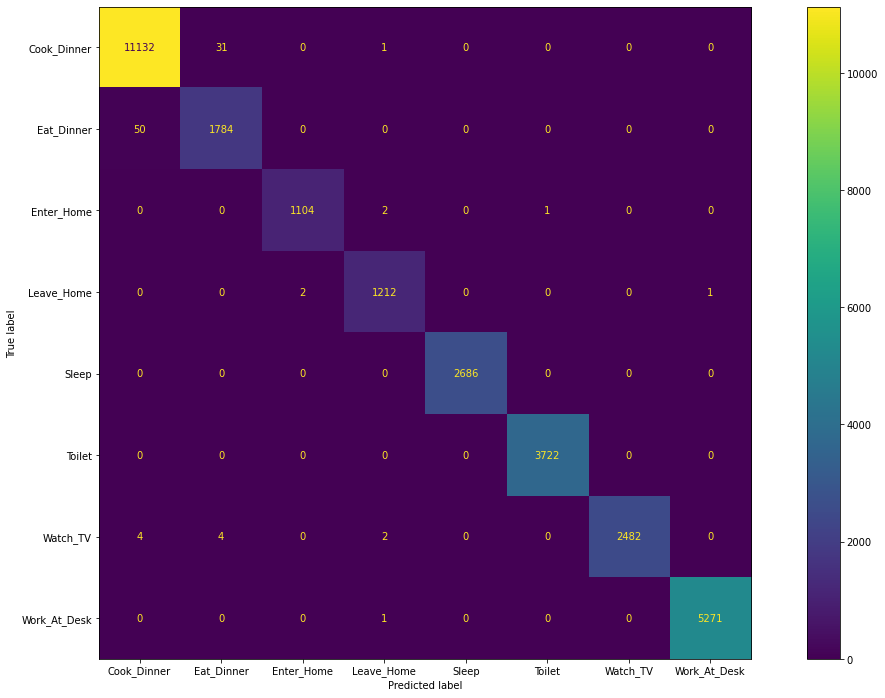

In [ ]:
fig, ax = plt.subplots(figsize=(20, 12))
plt.xticks(rotation=180)
plot_confusion_matrix(xgb,x_test,y_test,ax=ax)

In [ ]:
print(classification_report(y_test, XGB_pred))

              precision    recall  f1-score   support

 Cook_Dinner       1.00      1.00      1.00     11164
  Eat_Dinner       0.98      0.97      0.98      1834
  Enter_Home       1.00      1.00      1.00      1107
  Leave_Home       1.00      1.00      1.00      1215
       Sleep       1.00      1.00      1.00      2686
      Toilet       1.00      1.00      1.00      3722
    Watch_TV       1.00      1.00      1.00      2492
Work_At_Desk       1.00      1.00      1.00      5272

    accuracy                           1.00     29492
   macro avg       1.00      1.00      1.00     29492
weighted avg       1.00      1.00      1.00     29492



In [ ]:
XGB_accuracy=accuracy_score(y_test, XGB_pred)
XGB_accuracy=XGB_accuracy*100
print("The accuracy for X-Gradient Boost model is",round(XGB_accuracy,2),"%")

The accuracy for X-Gradient Boost model is 99.66 %


##LSTM-RNN Model

In [ ]:
x_train.shape,x_test.shape

((68812, 16), (29492, 16))

In [ ]:
y_train.shape,y_test.shape

((68812,), (29492,))

In [ ]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'
Y_train= label_encoder.fit_transform(y_train)

In [ ]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'
Y_test= label_encoder.fit_transform(y_test)

In [ ]:
X_train=np.reshape(np.array(x_train),(68812,-1,16))
X_test=np.reshape(np.array(x_test),(29492,-1,16))

In [ ]:
from keras.utils import to_categorical
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

In [ ]:
X_train.shape,X_test.shape

((68812, 1, 16), (29492, 1, 16))

In [ ]:
Y_train.shape,Y_test.shape

((68812, 8), (29492, 8))

##Validation Data

In [ ]:
X_test,X_val,Y_test,Y_val=train_test_split(X_test,Y_test,test_size=0.5,random_state=100)

In [ ]:
X_test.shape,X_val.shape

((14746, 1, 16), (14746, 1, 16))

In [ ]:
Y_test.shape,Y_val.shape

((14746, 8), (14746, 8))

## LSTM Architecture

In [ ]:
model = Sequential()
model.add(LSTM(256,input_dim=16, recurrent_activation="sigmoid",activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(8, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               279552    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 8)                 5

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(X_train,Y_train,epochs=20,validation_data=(X_val,Y_val))

Epoch 1/20
2151/2151 [==============================] - 24s 10ms/step - loss: 15.9539 - accuracy: 0.3735 - val_loss: 1.7828 - val_accuracy: 0.3846
Epoch 2/20
2151/2151 [==============================] - 25s 12ms/step - loss: 1.8051 - accuracy: 0.3809 - val_loss: 1.7820 - val_accuracy: 0.3841
Epoch 3/20
2151/2151 [==============================] - 29s 13ms/step - loss: 1.7946 - accuracy: 0.3809 - val_loss: 1.7819 - val_accuracy: 0.3841
Epoch 4/20
2151/2151 [==============================] - 27s 13ms/step - loss: 1.8052 - accuracy: 0.3808 - val_loss: 1.7818 - val_accuracy: 0.3841
Epoch 5/20
2151/2151 [==============================] - 26s 12ms/step - loss: 1.8014 - accuracy: 0.3808 - val_loss: 1.7818 - val_accuracy: 0.3841
Epoch 6/20
2151/2151 [==============================] - 26s 12ms/step - loss: 1.8030 - accuracy: 0.3808 - val_loss: 1.7819 - val_accuracy: 0.3841
Epoch 7/20
2151/2151 [==============================] - 26s 12ms/step - loss: 1.7908 - accuracy: 0.3808 - val_loss: 1.7820 

In [ ]:
validation_loss,lstm_accuracy = model.evaluate(X_test, Y_test, batch_size=32, verbose=0)

In [ ]:
lstm_accuracy=lstm_accuracy*100

In [ ]:
print("The accuracy for LSTM model is",round(lstm_accuracy,2),"%")

The accuracy for LSTM model is 37.3 %


##Plotting All Accuracies

In [ ]:
model = ['Random Forest','KNN','LSTM','GaussianNaiveBayes','X-GradientBoost']
#acc = [rfc_accuracy, knn_accuracy,lstm_accuracy,gnb_accuracy,XGB_accuracy]
acc=[99.2,96.07,37.3,90.07,99.66]
import plotly.express as px
t=['Random Forest:'+'99.2'+"%",'KNN:'+'96.07'+'%','LSTM:'+'37.3'+'%','GaussianNaiveBayes:'+'90.07'+'%','X-GradientBoost'+'99.66'+'%']
fig = px.line(x=model, y=acc,text=t,markers=True )
fig.show()

In [ ]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=model,
    y=acc,
    mode="lines+markers+text",
    name="Lines, Markers and Text",
    text=t,
    textposition="bottom center",
    textfont=dict(
        family="sans serif",
        size=12,
        color="crimson"
    )
))
fig.update_layout(showlegend=False)

fig.show()